Beta: [2.9741139  1.32647526 5.985904   1.1766502  9.04039687 1.52897127]
Beta Std Error: [0.31865835 0.36644598 0.31265476 0.28430128 0.36494526 0.51447342]
Beta Covariance: [[ 1.11005523e+01  7.21496490e-01  5.32961754e-01 -3.59766269e-01
   2.73189079e-02 -6.21678174e-02]
 [ 7.21496490e-01  1.46795895e+01  7.47014469e-01 -3.97846412e-01
   4.58332452e-02 -9.95841745e-02]
 [ 5.32961754e-01  7.47014469e-01  1.06862192e+01  5.88733442e-01
   1.09998905e+00 -2.15627048e+00]
 [-3.59766269e-01 -3.97846412e-01  5.88733442e-01  8.83591667e+00
   6.83902482e-01 -1.14614723e+00]
 [ 2.73189079e-02  4.58332452e-02  1.09998905e+00  6.83902482e-01
   1.45595999e+01 -5.59364633e-01]
 [-6.21678174e-02 -9.95841745e-02 -2.15627048e+00 -1.14614723e+00
  -5.59364633e-01  2.89347593e+01]]
Residual Variance: 0.009147575780001634
Inverse Condition #: 0.6859320058774604
Reason(s) for Halting:
  Sum of squares convergence
Beta: [3.00516022 1.36623102 6.19549147 0.19237312 9.05785816 1.64367372]
Beta Std Err

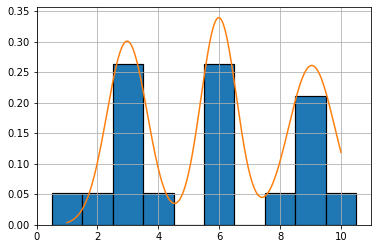

In [45]:
#Benotigte Madule(inkl. in Anaconda)
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random
from scipy.stats import norm

import sys

def gau(x,m,o):
    return (1/np.sqrt(2*np.pi*o**2))*np.exp(-(x-m)**2/(o**2)*2)

def func(B, x):
    [m1,o1,m2,o2,m3,o3]=B
    return gau(x,m1,o1)+gau(x,m2,o2)+gau(x,m3,o3)
    
def fit(x,y,x_err,y_err):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige
    model = Model(func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, model, beta0=[3., 1.,6., 1.,9., 1.])
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out

#U=600
U=np.array([600,500])
t2=np.array([1,1])
t1=np.array([1,1])
x=np.array([1,1])
s=x/1.875*10**(-4)
v1=s/t1
v2=s/t2
Q=(v1+v2)*np.sqrt(v1)/U*2*10**(-10)

stepsize=1

X=np.array([1,2,3,3,3,3,3,4,6,6,6,6,6,8,9,9,9,9,10]);

bins=np.arange(min(X)-stepsize/2,max(X)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(X,bins=bins,density=True,edgecolor='black', linewidth=1.2)

xf=np.arange(min(X),max(X)+1,stepsize)
yf=n
x_err=np.linspace(1,5,len(xf))
out=fit(xf,yf,np.nan,np.nan)
outerr=fit(xf,yf,x_err,np.nan)

x_p=np.linspace(min(X),max(X),1000)
y_p=func(out.beta,x_p)
f=plt.plot(x_p,y_p)
plt.grid()
out.pprint()
outerr.pprint()

In [43]:
x_err

array([0.1])